In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

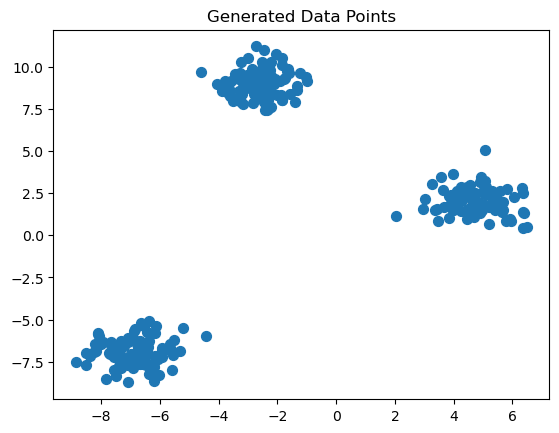

In [2]:
points, true_labels = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.8,
    random_state=42
)

plt.scatter(points[:,0], points[:,1], s=50)
plt.title("Generated Data Points")
plt.show()


In [3]:
def euclidean(a, b):
    return np.sqrt(np.sum((a-b)**2))

In [4]:
def kmeans_from_scratch(points, K=3, max_iter=20):
    
    np.random.seed(42)
    indices = np.random.choice(len(points), K, replace=False)
    centroids = points[indices]

    all_centroids = [centroids.copy()]   # iteration 기록 (시각화용)

    for iteration in range(max_iter):
        labels = []

        
        for p in points:
            distances = [euclidean(p, c) for c in centroids]
            labels.append(np.argmin(distances))
        labels = np.array(labels)

      
        new_centroids = []
        for k in range(K):
            cluster_points = points[labels == k]
            new_centroids.append(cluster_points.mean(axis=0))
        new_centroids = np.array(new_centroids)

        
        all_centroids.append(new_centroids.copy())

        
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return np.array(centroids), labels, all_centroids

In [5]:
centroids_scratch, labels_scratch, history = kmeans_from_scratch(points, K=3)

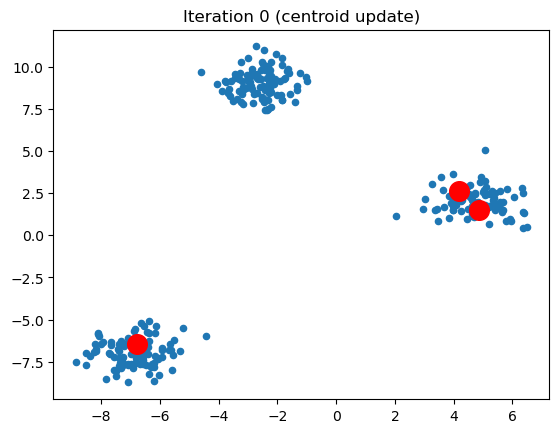

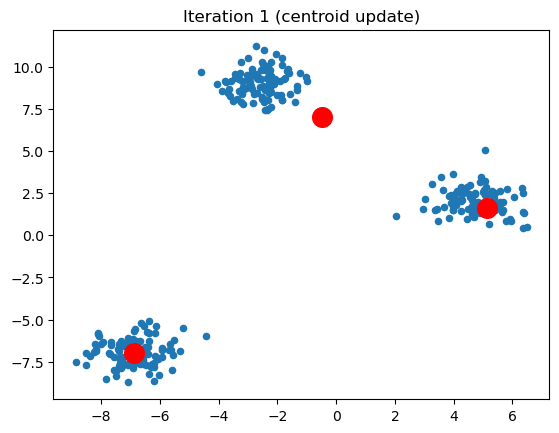

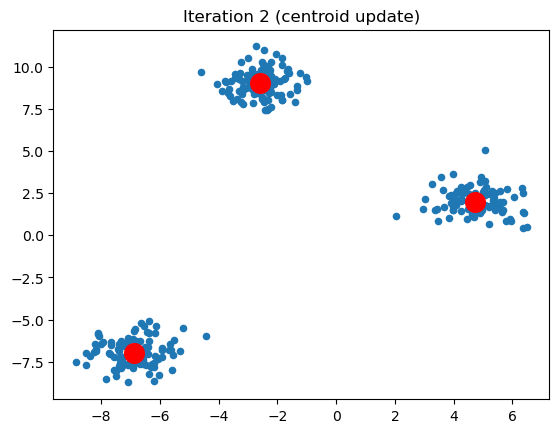

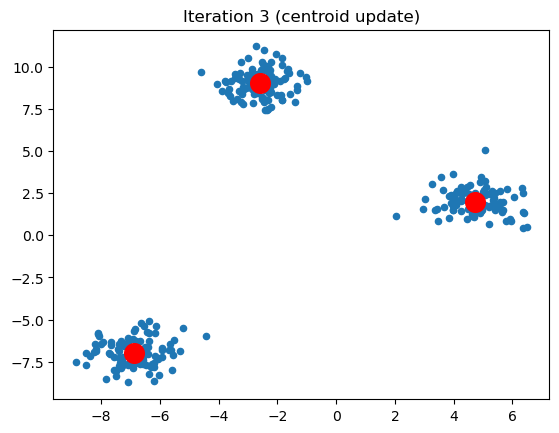

In [6]:
for i, c in enumerate(history):
    plt.scatter(points[:,0], points[:,1], s=20)
    plt.scatter(c[:,0], c[:,1], s=200, c="red")
    plt.title(f"Iteration {i} (centroid update)")
    plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(points)

centroids_sklearn = kmeans.cluster_centers_
labels_sklearn = kmeans.labels_

C:\Users\geluk\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\geluk\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\geluk\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\geluk\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

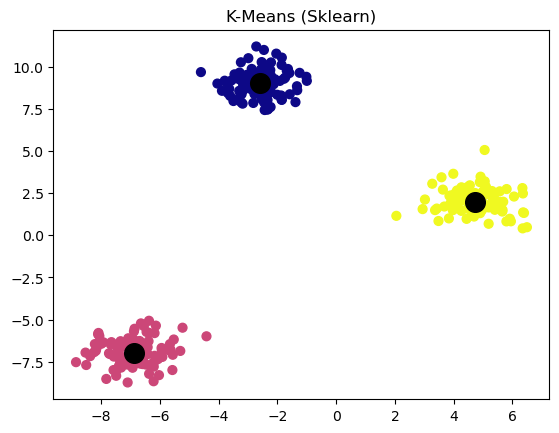

In [8]:
plt.scatter(points[:,0], points[:,1], c=labels_sklearn, cmap="plasma", s=40)
plt.scatter(centroids_sklearn[:,0], centroids_sklearn[:,1], c="black", s=200)
plt.title("K-Means (Sklearn)")
plt.show()